<a href="https://colab.research.google.com/github/Pink-Raccoon/MLDM_KaggleProjekt/blob/master/KaggleMiniprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal is to predict category of an incident (from temporal and gegraphical information) Type: Classification

In [24]:
!git clone https://github.com/Pink-Raccoon/MLDM_KaggleProjekt.git

fatal: destination path 'MLDM_KaggleProjekt' already exists and is not an empty directory.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import folium as fo
import seaborn as sns

#Loading data from file

In [26]:
train_data = pd.read_csv("/content/MLDM_KaggleProjekt/sf-crime/train.csv.zip")
train_data.columns

train_data
RANDOM_SEED = 0xdeadbeef

In [27]:
test_data = pd.read_csv("/content/MLDM_KaggleProjekt/sf-crime/test.csv.zip")
test_data.columns


Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

# Data-Processing

In [28]:
#Descript, Resoultion and address are not needed for analysis so they will be dropped
train_data = train_data.drop(columns=['Descript','Resolution', 'Address'])
train_data.dropna(inplace=True)


In [29]:
test_data = test_data.drop(columns=['Address'])
test_data.dropna(inplace=True)

In [30]:
train_data.dtypes

Dates          object
Category       object
DayOfWeek      object
PdDistrict     object
X             float64
Y             float64
dtype: object

In [31]:
#Change datatype of time 
date = pd.to_datetime(train_data["Dates"])
train_data["Year"] = date.dt.year
train_data["Month"] = date.dt.month
train_data["Day"] = date.dt.day
train_data["Hour"] = date.dt.hour
train_data["Minute"] = date.dt.minute
train_data = train_data.drop(columns=['Dates'])
train_data.dropna(inplace=True)

In [32]:
date = pd.to_datetime(test_data['Dates'])
test_data["Year"] = date.dt.year
test_data["Month"] = date.dt.month
test_data["Day"] = date.dt.day
test_data["Hour"] = date.dt.day
test_data["Minute"] = date.dt.minute
test_data = test_data.drop(columns=['Dates'])
test_data.dropna(inplace=True)



#Plotting the Data

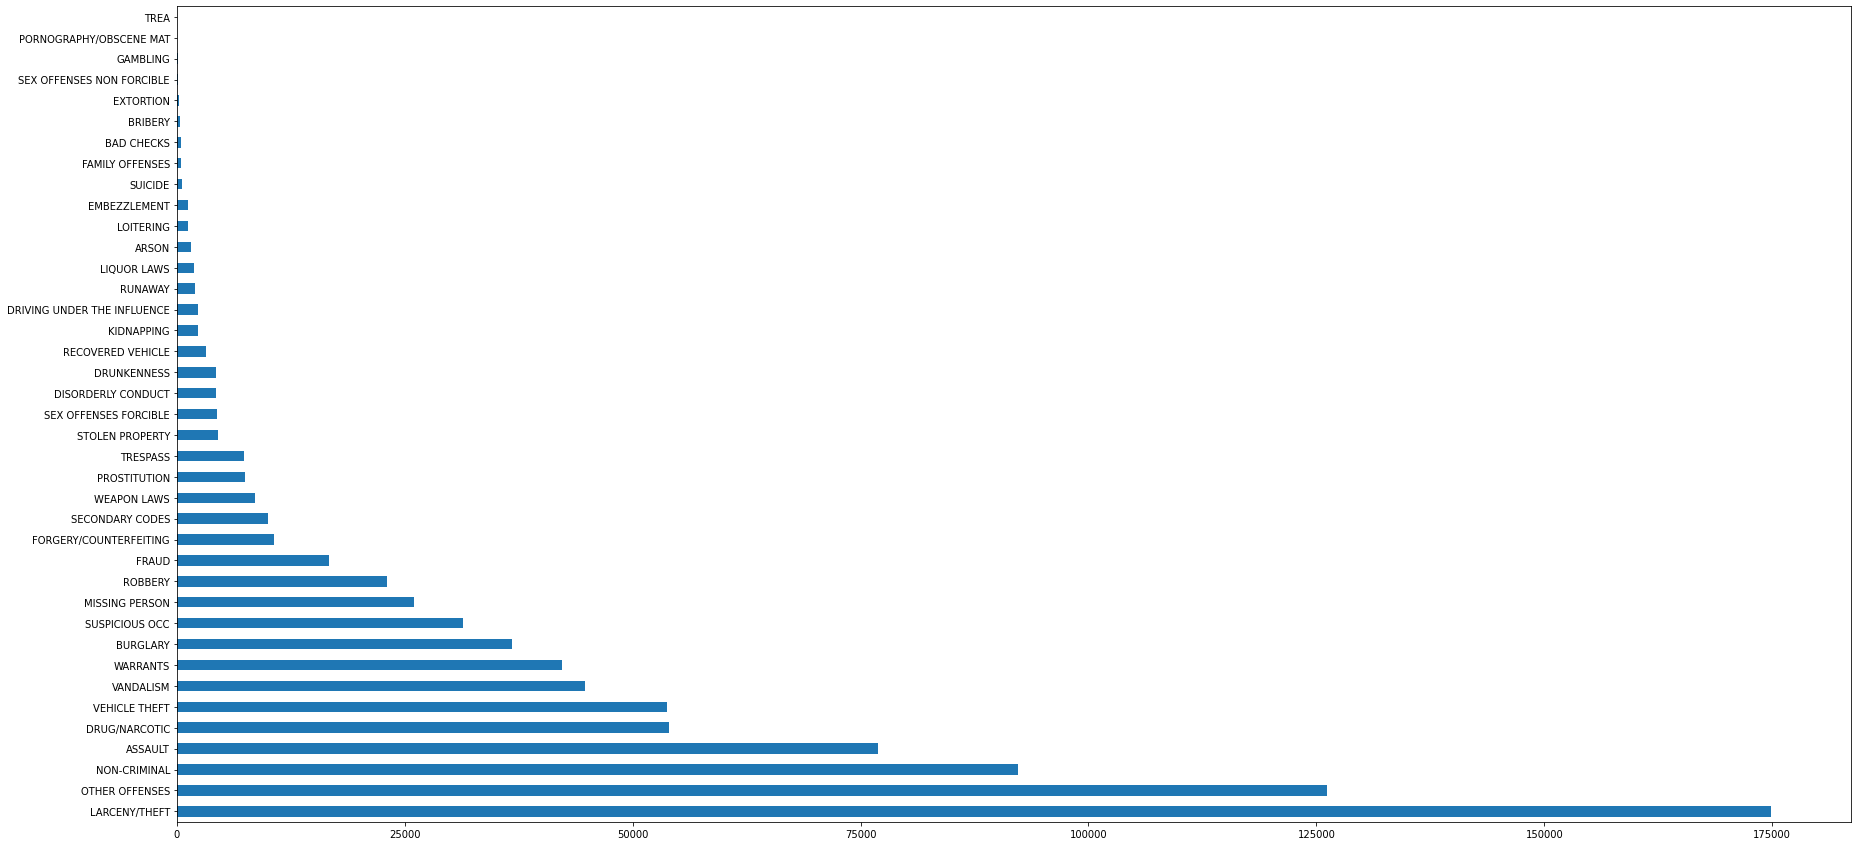

In [33]:
train_data['Category'].value_counts().plot(kind='barh',figsize=(30, 15))

Text(0.5, 1.0, 'Hour')

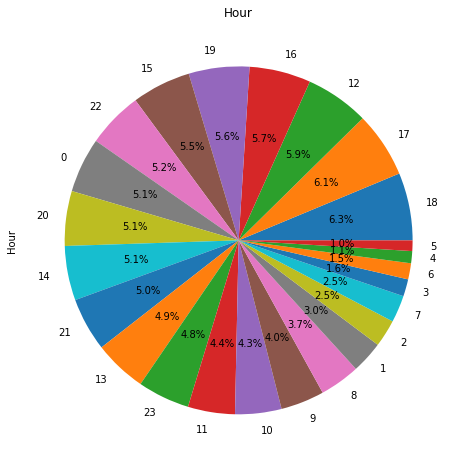

In [34]:
plt.figure(figsize=(15,8))
train_data['Hour'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Hour')

Text(0.5, 1.0, 'DayOfWeekay')

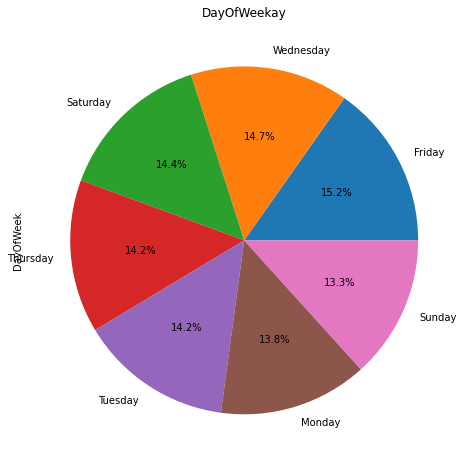

In [35]:
plt.figure(figsize=(15,8))
train_data['DayOfWeek'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('DayOfWeekay')

Text(0.5, 1.0, 'Year')

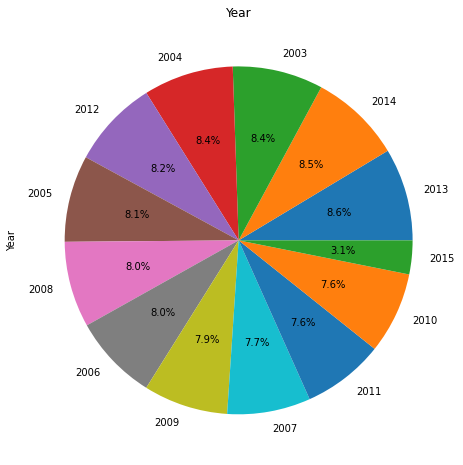

In [36]:
plt.figure(figsize=(15,8))
train_data['Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Year')

Text(0.5, 1.0, 'PdDistrict')

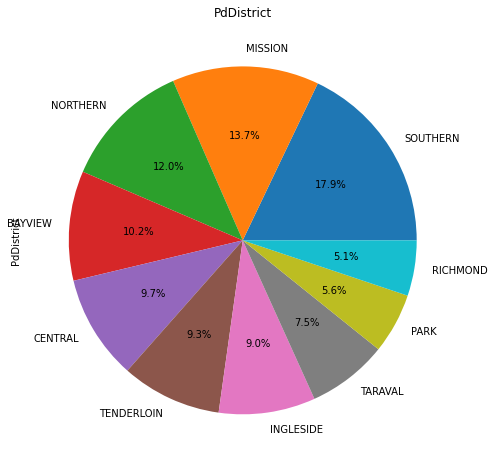

In [37]:
plt.figure(figsize=(15,8))
train_data['PdDistrict'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('PdDistrict')

In [38]:
#train_data.groupby('Category')['Hour'].value_counts()
bins_stuff = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
grps = train_data.groupby(['Category',pd.cut(train_data.Hour,bins_stuff)])
grps.size().unstack()






Hour,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]","(9, 10]",...,"(13, 14]","(14, 15]","(15, 16]","(16, 17]","(17, 18]","(18, 19]","(19, 20]","(20, 21]","(21, 22]","(22, 23]"
Category,,,,,,,,,,,,,,,,,,,,,
ARSON,87,100,91,98,61,47,35,33,30,46,...,51,50,47,53,55,69,83,69,94,94
ASSAULT,3789,3454,1738,1052,825,1034,1580,2573,2847,3164,...,3682,4154,4010,4147,4025,3940,3841,3978,3885,3644
BAD CHECKS,1,1,1,2,1,3,8,24,35,23,...,30,23,26,23,9,9,4,4,2,3
BRIBERY,9,10,7,2,4,3,4,2,14,14,...,17,14,18,20,15,19,14,14,13,19
BURGLARY,832,879,865,772,707,805,1272,2124,1794,1646,...,1514,1763,1999,2609,2574,1931,1631,1579,1541,1437
DISORDERLY CONDUCT,177,151,110,71,172,454,346,265,207,161,...,160,157,142,125,143,109,94,122,183,192
DRIVING UNDER THE INFLUENCE,272,285,118,51,26,34,16,15,21,8,...,28,33,45,68,77,105,116,142,204,245
DRUG/NARCOTIC,1043,808,546,379,205,600,1313,1733,2114,2422,...,4046,3758,3971,4011,3619,3156,2377,2278,2585,2282
DRUNKENNESS,349,273,121,59,13,40,66,72,78,105,...,152,154,177,234,238,254,237,273,319,310


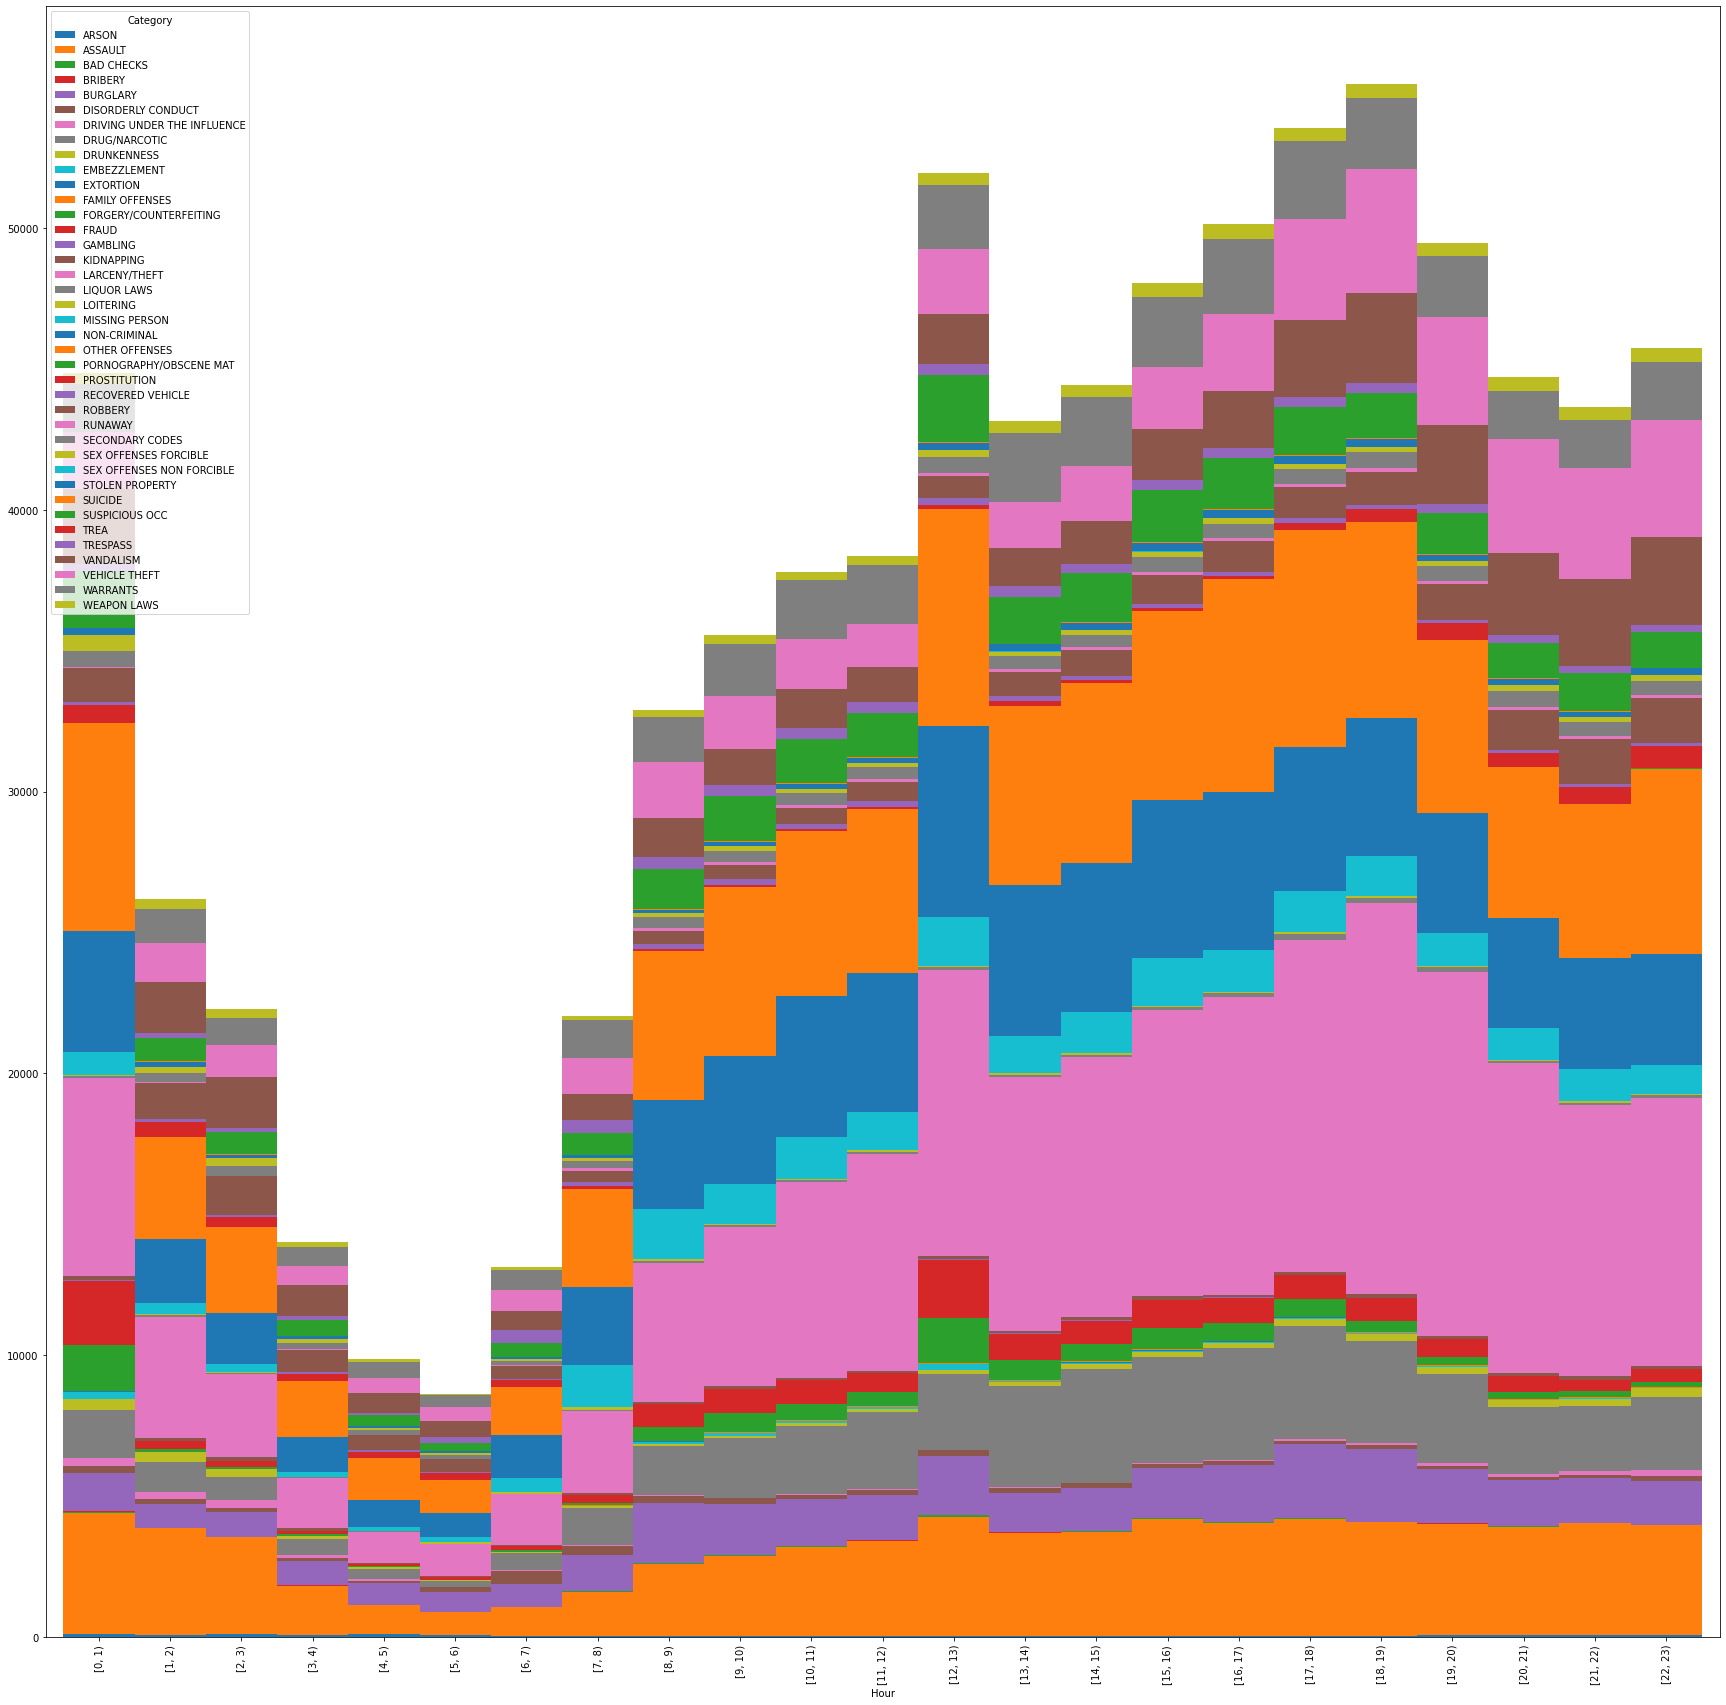

In [39]:
#train_data['Category'].hist(by=train_data['Hour'],figsize=(200,100))
train_data['Hour'] = pd.cut(train_data.Hour, bins = range(0,24),right=False)
(train_data.groupby('Hour').Category.value_counts().unstack().plot.bar(width=1,stacked=True, figsize=(30,30)))

In [40]:
bins_stuff = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
grps = train_data.groupby(['Category',pd.cut(train_data.Year,bins_stuff)])
grps.size().unstack()

Year,"(2003, 2004]","(2004, 2005]","(2005, 2006]","(2006, 2007]","(2007, 2008]","(2008, 2009]","(2009, 2010]","(2010, 2011]","(2011, 2012]","(2012, 2013]","(2013, 2014]","(2014, 2015]"
Category,,,,,,,,,,,,
ARSON,147,106,102,118,134,119,104,98,122,125,115,69
ASSAULT,6467,5779,6364,6105,6327,5976,6128,6117,6199,6280,6254,2325
BAD CHECKS,42,55,47,29,37,26,19,30,24,12,12,4
BRIBERY,18,18,19,23,21,20,30,27,28,32,26,15
BURGLARY,3330,3463,3550,2655,2800,2633,2491,2515,3135,3070,3006,1090
DISORDERLY CONDUCT,419,352,275,323,413,492,430,398,358,211,171,71
DRIVING UNDER THE INFLUENCE,110,98,135,164,206,286,233,233,207,217,184,60
DRUG/NARCOTIC,4873,4379,4700,5219,5866,5951,4489,3374,3408,3319,2767,751
DRUNKENNESS,315,335,356,338,345,410,328,318,315,477,301,109


In [41]:
bins_stuff = [1,2,3,4,5,6,7]
grps = train_data.groupby(['Category',pd.cut(train_data.Day,bins_stuff)])
grps.size().unstack()

Day,"(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]"
Category,,,,,,
ARSON,42,40,63,63,51,57
ASSAULT,2466,2563,2596,2601,2486,2591
BAD CHECKS,15,17,13,12,13,10
BRIBERY,11,3,10,5,10,9
BURGLARY,1094,1110,1153,1132,1239,1178
DISORDERLY CONDUCT,145,139,161,143,138,141
DRIVING UNDER THE INFLUENCE,83,69,93,82,66,65
DRUG/NARCOTIC,1748,1856,2017,1965,1916,1957
DRUNKENNESS,153,174,156,145,150,144


In [42]:
m = fo.Map(location=[37.773972,-122.446747],zoom_start=13)
fo.Marker(
    location=[37.774599,-122.425892],
    popup="Northern",
    icon=fo.Icon(color="darkgreen"),
).add_to(m)
fo.Marker(
    location=[37.771541,-122.438738],
    popup="Park",
    icon=fo.Icon(color="lightgreen"),
).add_to(m)
fo.Marker(
    location=[37.714056,-122.459033],
    popup="Taraval",
    icon=fo.Icon(color="gray"),
).add_to(m)
fo.Marker(
    location=[37.731948,-122.447364],
    popup="Ingleside",
    icon=fo.Icon(color="pink"),
).add_to(m)
fo.Marker(
    location=[37.780266,-122.403390],
    popup="Southern",
    icon=fo.Icon(color="darkblue"),
).add_to(m)
fo.Marker(
    location=[37.738212,-122.394926],
    popup="Bayview",
    icon=fo.Icon(color="red"),
).add_to(m)
fo.Marker(
    location=[37.78393202772729,-122.412597377187],
    popup="Tenderloin",
    icon=fo.Icon(color="black"),
).add_to(m)
fo.Marker(
    location=[37.7487740050495,-122.42257233421302],
    popup="Mission",
    icon=fo.Icon(color="orange"),
).add_to(m)

fo.Marker(
    location=[37.789434763004	,-122.406958660602],
    popup="Central",
    icon=fo.Icon(color="purple"),
).add_to(m)	
fo.Marker(
    location=[37.7725405391593	,-122.466204667893],
    popup="Richmond",
    icon=fo.Icon(color="lightblue"),
).add_to(m)	







m


#Data splitten

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


In [103]:
# Python3 program to Convert a
# list to dictionary
res_dct = {}
def addKey(i,res_dct,lst):
  res_dct[lst[i]] = i
  return res_dct
def Convert(lst,res_dct):
  for i in range(0, len(lst)-1):
    res_dct=addKey(i,res_dct,lst)
  return res_dct





In [110]:
df = pd.DataFrame(train_data,columns=['Category'])
cat_arr = np.unique(df.to_numpy())
cat_dict = Convert(cat_arr,res_dct)
print(cat_dict)
print(df.to_numpy()[0])

{'ARSON': 0, 'ASSAULT': 1, 'BAD CHECKS': 2, 'BRIBERY': 3, 'BURGLARY': 4, 'DISORDERLY CONDUCT': 5, 'DRIVING UNDER THE INFLUENCE': 6, 'DRUG/NARCOTIC': 7, 'DRUNKENNESS': 8, 'EMBEZZLEMENT': 9, 'EXTORTION': 10, 'FAMILY OFFENSES': 11, 'FORGERY/COUNTERFEITING': 12, 'FRAUD': 13, 'GAMBLING': 14, 'KIDNAPPING': 15, 'LARCENY/THEFT': 16, 'LIQUOR LAWS': 17, 'LOITERING': 18, 'MISSING PERSON': 19, 'NON-CRIMINAL': 20, 'OTHER OFFENSES': 21, 'PORNOGRAPHY/OBSCENE MAT': 22, 'PROSTITUTION': 23, 'RECOVERED VEHICLE': 24, 'ROBBERY': 25, 'RUNAWAY': 26, 'SECONDARY CODES': 27, 'SEX OFFENSES FORCIBLE': 28, 'SEX OFFENSES NON FORCIBLE': 29, 'STOLEN PROPERTY': 30, 'SUICIDE': 31, 'SUSPICIOUS OCC': 32, 'TREA': 33, 'TRESPASS': 34, 'VANDALISM': 35, 'VEHICLE THEFT': 36, 'WARRANTS': 37}
['WARRANTS']


In [108]:
target = [key for ele in df.to_numpy()
          for key, val in cat_dict.items() if ele in val]

TypeError: ignored

In [56]:
X_train, X_valid, y_train, y_valid= train_test_split(train_data,cat_dict,train_size=0.8, random_state=RANDOM_SEED)

KeyError: ignored

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: ignored